<div style="border:solid green 2px; padding: 20px">
Антон, привет и хорошего дня! <br>
Меня зовут Сергей Дроздов, и я буду проверять твой проект. Предлагаю общаться на «ты». Если тебе удобнее общаться на "Вы", просто дай знать. 

Ты уже проделал(а) большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Так будут выделены комментарии с указаниями, обязательными к выполнению. Без их выполнения проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:
&#9888;</b> Так будут выделены некритичные замечания. Их отработка позволит улучшить качество твоего проекта.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Так будут выделены остальные комментарии, полезные лайфхаки и ссылки на сторонние ресурсы </div>
    <br>
<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;background:rgb(185, 176, 207)">
<b>Итоговый комментарий ревьюера:
</b> Так будут выделены итоговые комментарии.
</div>

Для наиболее эффективной и оперативной работы над проектом, мне хотелось бы иметь обратную связь. Не стесняйся задавать вопросы. Если ты что-либо меняешь в проекте, пожалуйста, комментируй это. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например так</div>

**Проект Телеком**

**Цель проекта:**
<Br>
Построить модель по прогнозировнию оттока клиентов для оператора связи 
«Ниединогоразрыва.ком». Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. 




# План проекта

**План проекта**


1.   Произвести предварительные анализ и проверку предоставленных данных, которые были получены из 4 разных источнико : contract_new.csv ,personal_new.csv, internet_new.csv  и phone_new.csv. П
2.   Осуществить обработку данных: объеденить данные в единый датафрейм, определить признаки target и features.
3. Подготовить данные к обучению, учитывая баланс классов и наличие категорияльных данных
4. Обучить модели и произвести тестирование метрикой AUC-ROC


**Импорт библиотек**

In [1]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.4 MB/s eta 0:00:00


In [2]:
pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 18.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import (train_test_split, GridSearchCV, RandomizedSearchCV)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
import phik
from phik import resources, report
import time

In [4]:
# Константы
RANDOM_STATE = 220523

**Загрузка данных**

In [5]:
contract = pd.read_csv('https://code.s3.yandex.net/datasets/contract_new.csv',index_col='customerID')
personal = pd.read_csv('https://code.s3.yandex.net/datasets/personal_new.csv',index_col='customerID')
internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet_new.csv',index_col='customerID')
phone = pd.read_csv('https://code.s3.yandex.net/datasets/phone_new.csv',index_col='customerID')

# Предварительный анализ данных

### Данные **contract**

In [6]:
#Анализ данных начнем последовательно , начиная с contract
display(contract.head(3))


,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17


In [7]:
display(contract.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(6)
memory usage: 440.2+ KB


None

Следует внести корректировки и изменить тип данных в соедующих столбцах:
*   BeginDate,EndDate сменить на datetime
*   TotalCharges сменить на float




In [8]:
#переводим BeginDate в формат datetime
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], format='%Y-%m-%d')

Дата начала датасета:  2013-10-01 00:00:00
Дата конца датасета:  2020-02-01 00:00:00


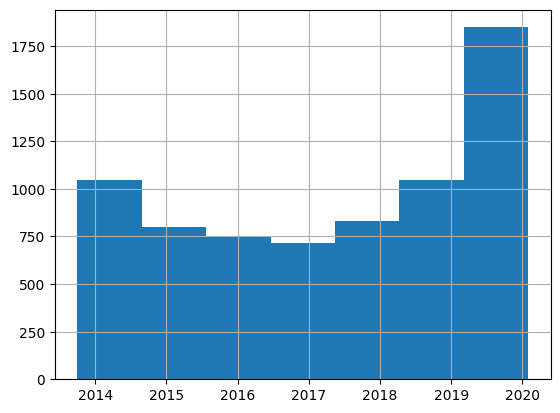

In [9]:
BeginDate = contract['BeginDate']
BeginDate.hist(bins = 7)
print('Дата начала датасета: ', min(contract['BeginDate']))
print('Дата конца датасета: ', max(contract['BeginDate']))

In [10]:
#проанализируем столбец EndDate
contract['EndDate'].describe()

count     7043
unique      67
top         No
freq      5942
Name: EndDate, dtype: object

In [11]:
contract['EndDate'].unique()

array(['No', '2017-05-01', '2016-03-01', '2018-09-01', '2018-11-01',
       '2018-12-01', '2019-08-01', '2018-07-01', '2017-09-01',
       '2015-09-01', '2016-07-01', '2016-06-01', '2018-03-01',
       '2019-02-01', '2018-06-01', '2019-06-01', '2020-01-01',
       '2019-11-01', '2016-09-01', '2015-06-01', '2016-12-01',
       '2019-05-01', '2019-04-01', '2017-06-01', '2017-08-01',
       '2018-04-01', '2018-08-01', '2018-02-01', '2019-07-01',
       '2015-12-01', '2014-06-01', '2018-10-01', '2019-01-01',
       '2017-07-01', '2017-12-01', '2018-05-01', '2015-11-01',
       '2019-10-01', '2019-03-01', '2016-02-01', '2016-10-01',
       '2018-01-01', '2017-11-01', '2015-10-01', '2019-12-01',
       '2015-07-01', '2017-04-01', '2015-02-01', '2017-03-01',
       '2016-05-01', '2016-11-01', '2015-08-01', '2019-09-01',
       '2017-10-01', '2017-02-01', '2016-08-01', '2016-04-01',
       '2015-05-01', '2014-09-01', '2014-10-01', '2017-01-01',
       '2015-03-01', '2015-01-01', '2016-01-01', 

В данных есть 5942 объекта NO- это "живые" пользователи ,а остальные даты ухода абонента .

In [12]:
#укажем для NO последнюю дату в датафрейме
contract['EndDate'] = contract['EndDate'].where(contract['EndDate'] != 'No', '2020-02-01')

#переведем тип данных EndDate в datetime
contract['EndDate'] = pd.to_datetime(contract['EndDate'])

In [13]:
contract['EndDate'].describe()

<ipython-input-13-e423c306e3b5>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  contract['EndDate'].describe()


count                    7043
unique                     67
top       2020-02-01 00:00:00
freq                     5942
first     2014-06-01 00:00:00
last      2020-02-01 00:00:00
Name: EndDate, dtype: object

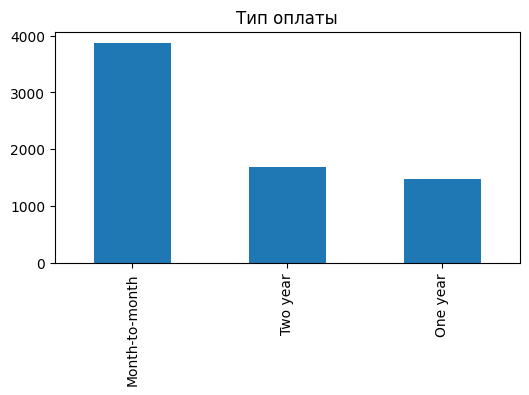

In [14]:
#проведем анализ столбца Type
Type = contract['Type']
Type.value_counts().plot(kind="bar", figsize=(6,3))
plt.title('Тип оплаты');

Для большинства клиентов характерна помесячная оплата. Оплата одного и двух лет схожи. 😀 хотя я не понимаю, что это за оплата раз в год или за два года

Text(0.5, 1.0, 'Способ оплаты')

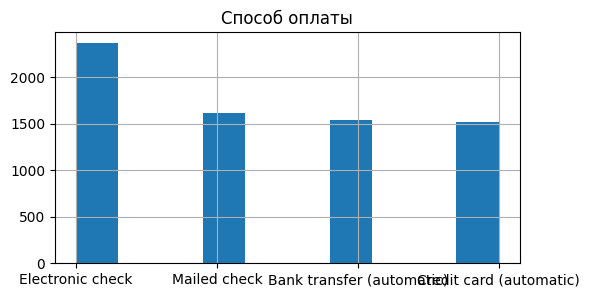

In [15]:
#проведем анализ столбца PaymentMethod
contract['PaymentMethod'].hist(figsize=(6,3))
plt.title('Способ оплаты')

Text(0.5, 1.0, 'Ежемесячные траты на услуги')

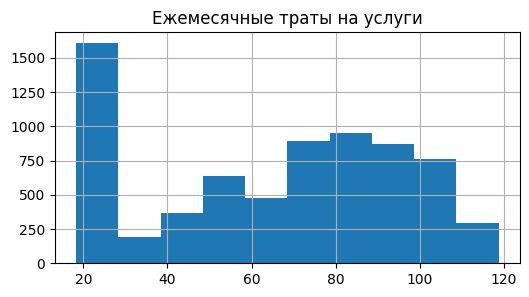

In [16]:
#проведем анализ столбца MonthlyCharges
contract['MonthlyCharges'].hist(bins=10, figsize=(6,3))
plt.title('Ежемесячные траты на услуги')

In [17]:
#заменим тип данных TotalCharges на float и проведем анализ 
#contract['TotalCharges'] = contract['TotalCharges'].astype(float) 
display(contract[contract['TotalCharges'] == ' '])

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,
3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,
5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,
4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,
1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,
7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,
3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,
2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,
2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,


По новым клиентам (2020-02-01) отсутствуют данные, предпоалагю, что они еще не успели оплатить

In [18]:
#присваивем 0 всем пустым значениям TotalCharges
contract.loc[contract['TotalCharges'] == " ", 'TotalCharges'] = 0

In [19]:
#менять тип данных на float
contract['TotalCharges'] = contract['TotalCharges'].astype(float) 

count    7043.000000
mean     2115.312885
std      2112.742814
min         0.000000
25%       436.750000
50%      1343.350000
75%      3236.690000
max      9221.380000
Name: TotalCharges, dtype: float64

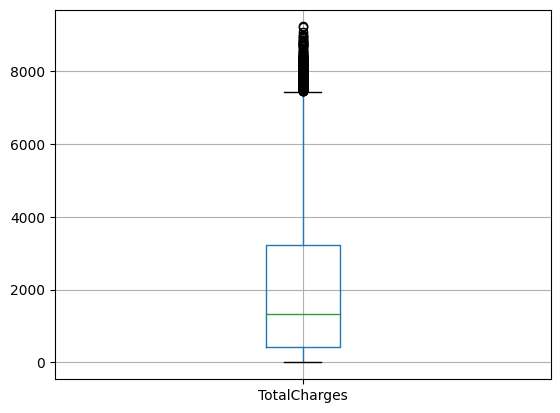

In [20]:
contract.boxplot(column ='TotalCharges')
display(contract['TotalCharges'].describe())


Среднее значение потраченных на услуги денег соствляет 2115, при этом распредление данных скошенно в право и в данных присутствую выбросы  - значения более 8000

## Данные **personal**

In [21]:
personal.head()

,gender,SeniorCitizen,Partner,Dependents
customerID,,,,
7590-VHVEG,Female,0,Yes,No
5575-GNVDE,Male,0,No,No
3668-QPYBK,Male,0,No,No
7795-CFOCW,Male,0,No,No
9237-HQITU,Female,0,No,No


In [22]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7043 non-null   object
 1   SeniorCitizen  7043 non-null   int64 
 2   Partner        7043 non-null   object
 3   Dependents     7043 non-null   object
dtypes: int64(1), object(3)
memory usage: 275.1+ KB


<Axes: xlabel='count', ylabel='gender'>

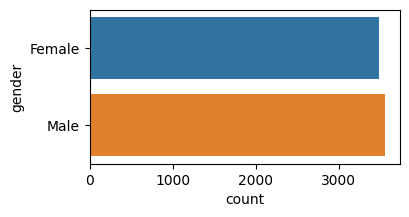

In [23]:
plt.figure(figsize=(4,2))
sns.countplot(y='gender', data=personal)

<Axes: xlabel='count', ylabel='SeniorCitizen'>

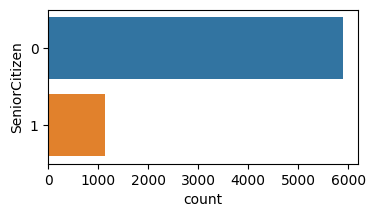

In [24]:
plt.figure(figsize=(4,2))
sns.countplot(y='SeniorCitizen', data=personal)

<Axes: xlabel='count', ylabel='Partner'>

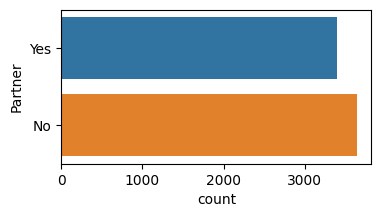

In [25]:
plt.figure(figsize=(4,2))
sns.countplot(y='Partner', data=personal)

<Axes: xlabel='count', ylabel='Dependents'>

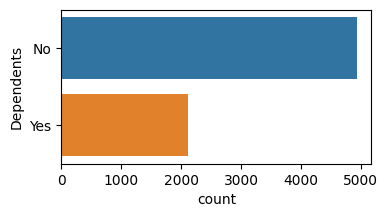

In [26]:
plt.figure(figsize=(4,2))
sns.countplot(y='Dependents', data=personal)

Все данные категориальные.

*   Клиенты разного пола распределены почти одинаково
*   Доля клиентов пенсионного возраста низкая -10%, но не критичная, теоритечески данный фактор может оказать негативное влияние на модель
*   Количество клиентов с/без супруга примерно одинаково
*   Клиенты с/без иждевенцами находятся в пропорции 30%/70%

## Данные **internet**

In [27]:
internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,
7590-VHVEG,DSL,No,Yes,No,No,No,No
5575-GNVDE,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,Fiber optic,No,No,No,No,No,No


In [28]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5517 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   5517 non-null   object
 1   OnlineSecurity    5517 non-null   object
 2   OnlineBackup      5517 non-null   object
 3   DeviceProtection  5517 non-null   object
 4   TechSupport       5517 non-null   object
 5   StreamingTV       5517 non-null   object
 6   StreamingMovies   5517 non-null   object
dtypes: object(7)
memory usage: 344.8+ KB


<Axes: xlabel='count', ylabel='InternetService'>

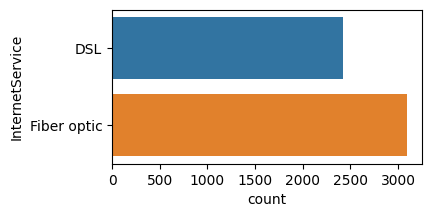

In [29]:
plt.figure(figsize=(4,2))
sns.countplot(y='InternetService', data=internet)

<Axes: xlabel='count', ylabel='OnlineSecurity'>

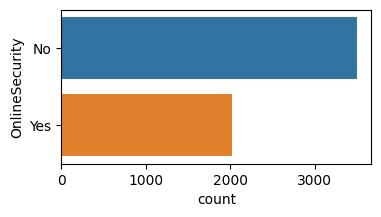

In [30]:
plt.figure(figsize=(4,2))
sns.countplot(y='OnlineSecurity', data=internet)

<Axes: xlabel='count', ylabel='OnlineBackup'>

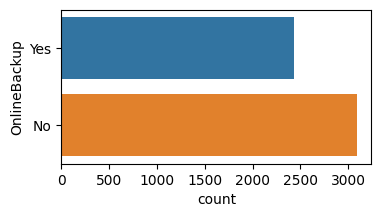

In [31]:
plt.figure(figsize=(4,2))
sns.countplot(y='OnlineBackup', data=internet)

<Axes: xlabel='count', ylabel='DeviceProtection'>

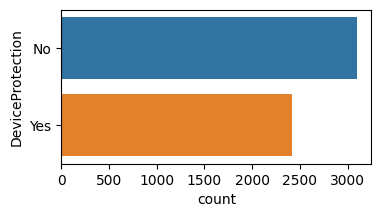

In [32]:
plt.figure(figsize=(4,2))
sns.countplot(y='DeviceProtection', data=internet)

<Axes: xlabel='count', ylabel='TechSupport'>

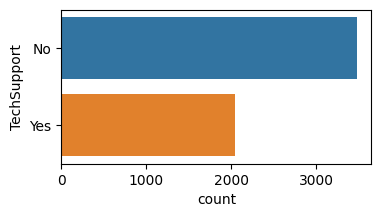

In [33]:
plt.figure(figsize=(4,2))
sns.countplot(y='TechSupport', data=internet)

<Axes: xlabel='count', ylabel='StreamingTV'>

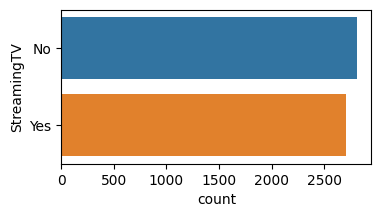

In [34]:
plt.figure(figsize=(4,2))
sns.countplot(y='StreamingTV', data=internet)

<Axes: xlabel='count', ylabel='StreamingMovies'>

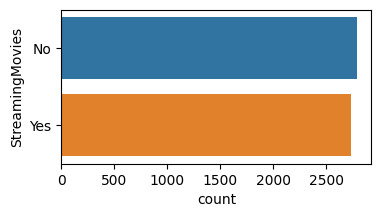

In [35]:
plt.figure(figsize=(4,2))
sns.countplot(y='StreamingMovies', data=internet)

Все данные категориальные и относительно сбалансированные.
Можно отметить, что поддрежкой и онлайн безопасностью пользуется примерно 40%, а большая часть клиентов использует для соединения Fiber Optic

## Данные **phone**

In [36]:
phone.head()

,MultipleLines
customerID,
5575-GNVDE,No
3668-QPYBK,No
9237-HQITU,No
9305-CDSKC,Yes
1452-KIOVK,Yes


In [37]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6361 entries, 5575-GNVDE to 3186-AJIEK
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MultipleLines  6361 non-null   object
dtypes: object(1)
memory usage: 99.4+ KB


<Axes: xlabel='count', ylabel='MultipleLines'>

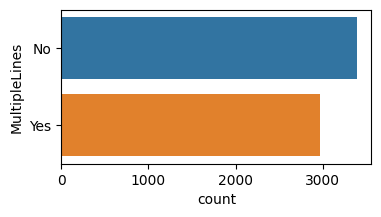

In [38]:
plt.figure(figsize=(4,2))
sns.countplot(y='MultipleLines', data=phone)

Возможность ведения параллельных линий во время звонка доступна примерно половине клиентов

# Обработка данных

Доабвляем целевой признак LOSS - уход клиента, который определям если EndDate не равен 2020-02-01

In [39]:
contract['Loss'] = (contract['EndDate'] != '2020-02-01').astype(int)

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Отлично! Целевой признак определен! </div>
    <br>

In [40]:
contract.head(10)

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Loss
customerID,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0
9305-CDSKC,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,99.65,1150.96,0
1452-KIOVK,2018-04-01,2020-02-01,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,0
6713-OKOMC,2019-04-01,2020-02-01,Month-to-month,No,Mailed check,29.75,300.48,0
7892-POOKP,2017-07-01,2020-02-01,Month-to-month,Yes,Electronic check,104.80,3573.68,0


In [41]:
#объеденим данные в 1 датафрейм
data = contract.copy()
data = data.join(personal)
data = data.join(internet)
data = data.join(phone)

In [42]:
#Код ревьюера
data.isna().sum()

BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Loss                   0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64

In [43]:
#заполним все возникшие пропуски 
data = data.fillna('No')

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   datetime64[ns]
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   float64       
 7   Loss              7043 non-null   int64         
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup  

In [45]:
#создадим новый признак - длительность пользования услугами
data['Duration'] = (data['EndDate'] - data['BeginDate']).dt.days

In [46]:
data.head(3)

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Loss,gender,SeniorCitizen,...,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Duration
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,Female,0,...,No,DSL,No,Yes,No,No,No,No,No,31
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,Male,0,...,No,DSL,Yes,No,Yes,No,No,No,No,1036
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,Male,0,...,No,DSL,Yes,Yes,No,No,No,No,No,123


<Axes: >

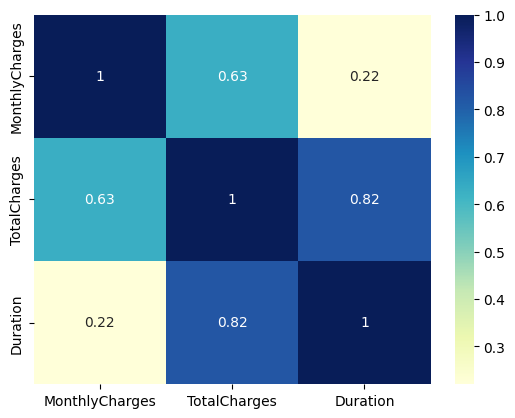

In [47]:
#Проверка мультиколлинеарности    
sns.heatmap(data[['MonthlyCharges','TotalCharges','Duration']].corr(), cmap="YlGnBu", annot=True)  


<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Из корреляции Пирсона необходимо убрать бинарный таргет и категориальный признак SeniorCitizen. Также нужно проанализировать категориальные признаки(можешь использовать библиотеку phik, которая отлично справляется со смешанными типами данных и не требует кодирования) </div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Спасибо, не обратил на это внимания. Скорректировал</div>

<div class="alert alert-success">
<b>Комментарий ревьюера V2:
&#9989;</b> Отлично! </div>
    <br>

<Axes: >

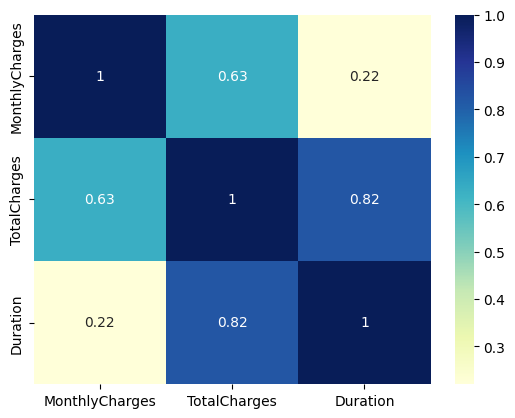

In [48]:
sns.heatmap(data[['MonthlyCharges','TotalCharges','Duration']].corr(), cmap="YlGnBu", annot=True)  

interval columns not set, guessing: ['MonthlyCharges', 'TotalCharges', 'Loss', 'SeniorCitizen', 'Duration']


<Axes: >

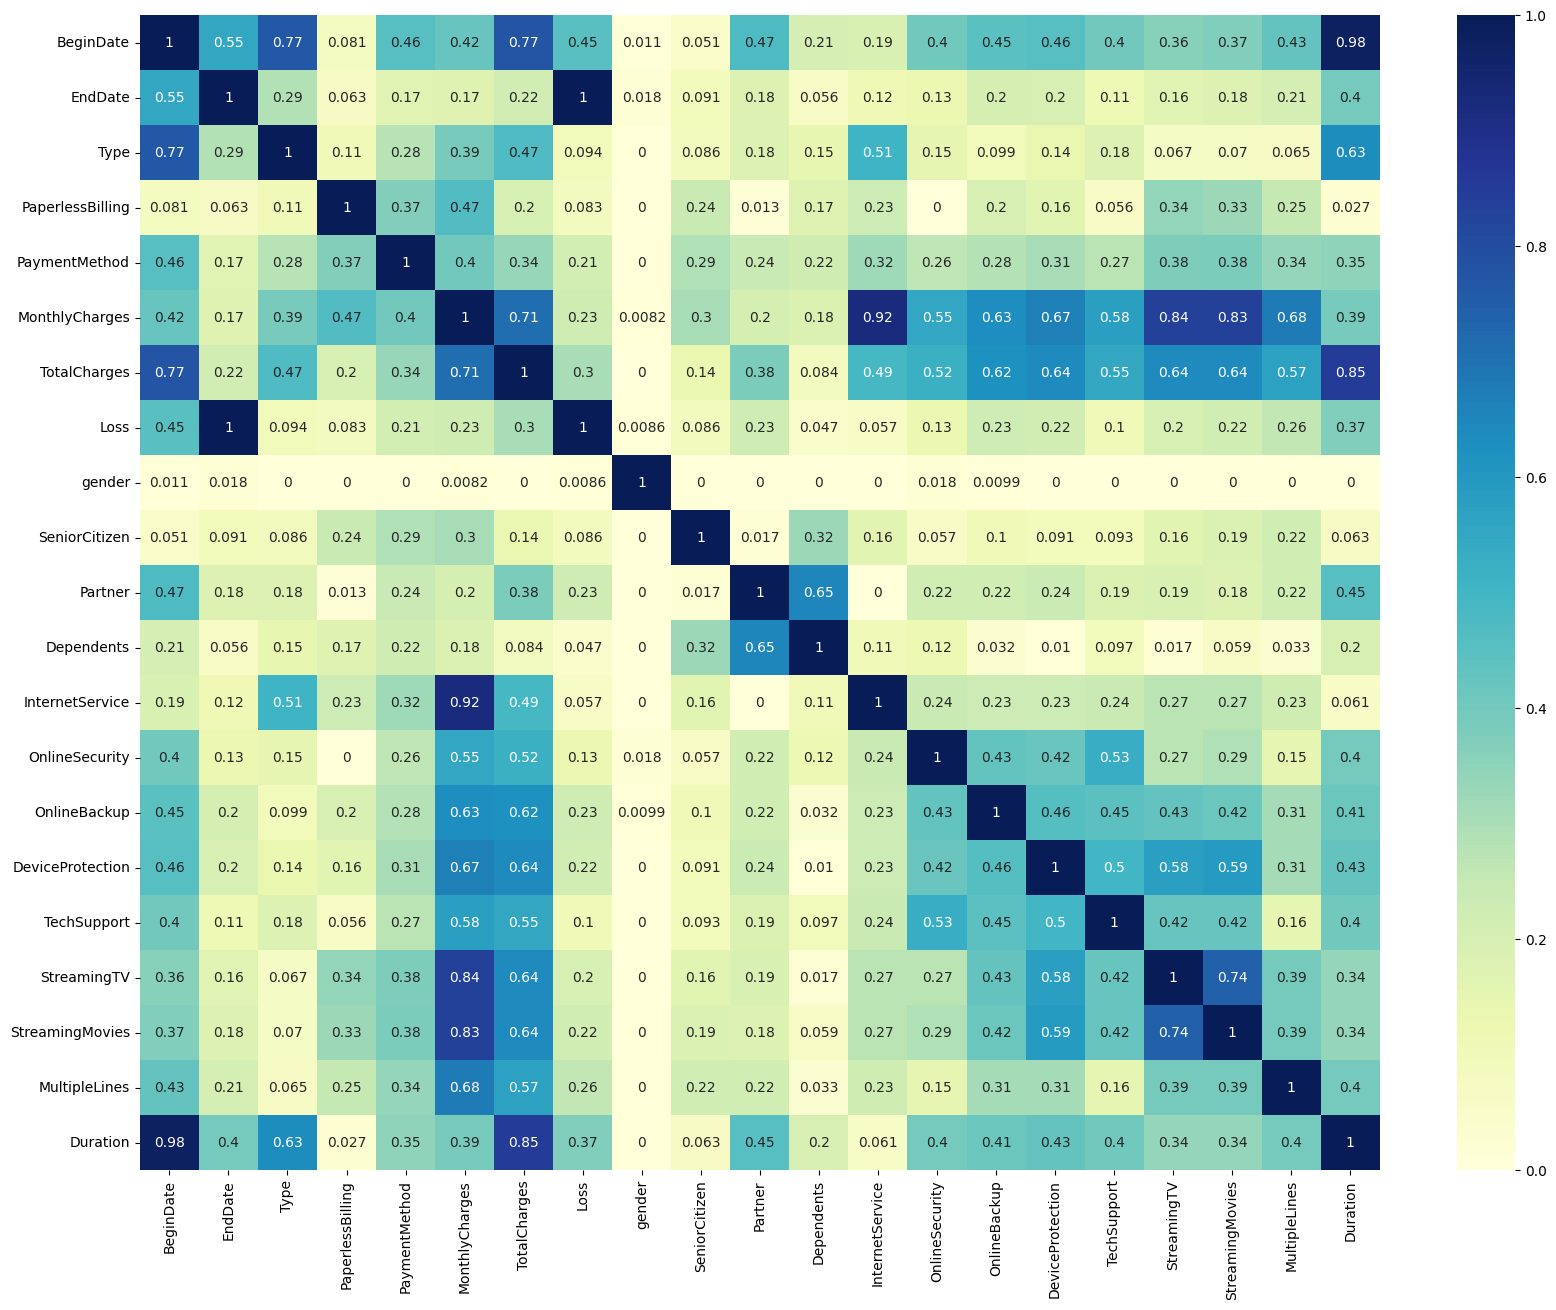

In [49]:
plt.figure(figsize=(20,15))
sns.heatmap(data.phik_matrix(), cmap="YlGnBu", annot=True)  

высокая сетепень корреляции между данными TotalCharges и Duration равная 0.82 ,  а также  0.63 между MonthlyCharges и TotalCharges. 
При этом если рассматривать мультиколлинеарность всех признаков,то отслеживается высокая свзяь MonthlyCharges с InternetService, StreamingTV, StreamingMovies. 

<Axes: xlabel='count', ylabel='Loss'>

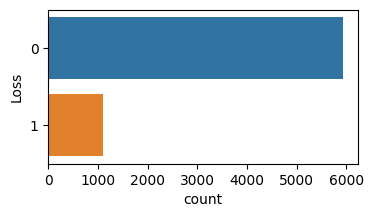

In [50]:
plt.figure(figsize=(4,2))
sns.countplot(y='Loss', data=data)

Наблюдается несбалансированность целевого признака

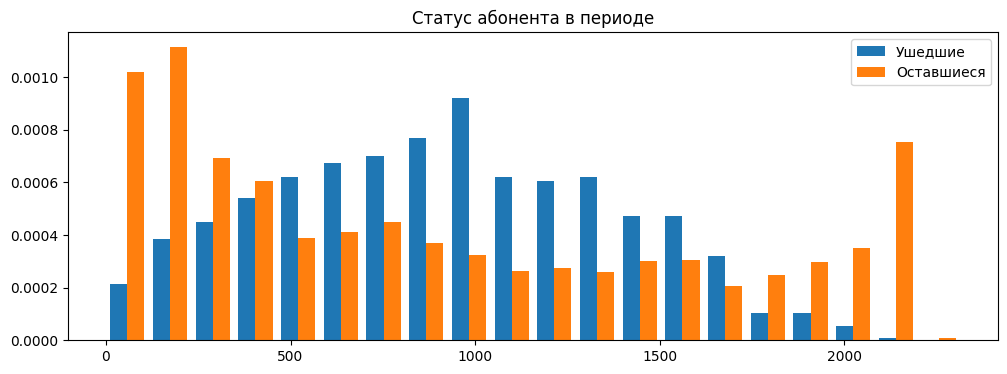

In [51]:
plt.figure(figsize=(12,4))
plt.hist([data[data.Loss == 1].Duration, data[data.Loss == 0].Duration], label=['Ушедшие', 'Оставшиеся'], density=True,bins =20);
plt.legend();
plt.title('Статус абонента в периоде');
plt.show();

Пик ухода абонентов происходит к 3 году пользования услугами

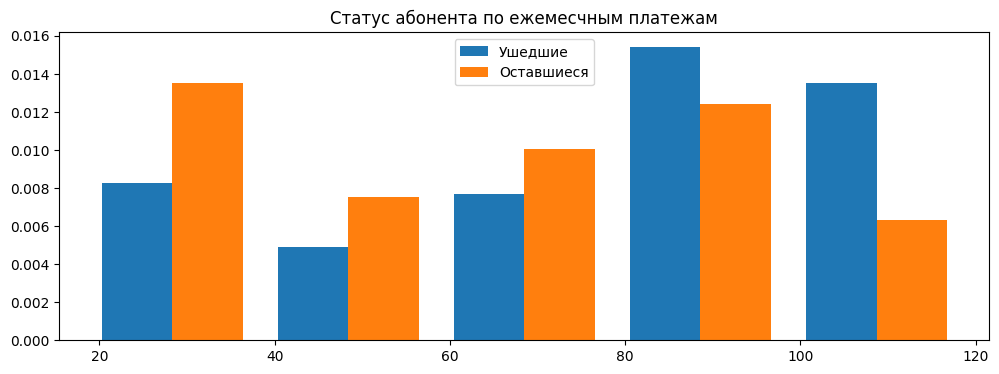

In [52]:
plt.figure(figsize=(12,4))
plt.hist([data[data.Loss == 1].MonthlyCharges, data[data.Loss == 0].MonthlyCharges], label=['Ушедшие', 'Оставшиеся'], density=True,bins =5);
plt.legend();
plt.title('Статус абонента по ежемесчным платежам');
plt.show();

Наибольшее число ушедших абонтов имели ежемесячные платежы равные 80+

# Подготовить данных к обучению


In [53]:
numeric_features = ['MonthlyCharges', 'Duration']
categorical_features = ['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 
                        'Partner', 'Dependents', 'InternetService', 'OnlineSecurity',
                        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                        'StreamingMovies', 'MultipleLines', 'SeniorCitizen']

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> SeniorCitizen - категориальный признак </div>

<div class="alert alert-info"> <b>Комментарий студента:</b>  Скорректировал</div>

<div class="alert alert-success">
<b>Комментарий ревьюера V2:
&#9989;</b> Отлично! </div>

In [54]:
#удаляем лишние столбцы с датами и коллиниарный признак TotalCharges
data_new = data.drop(['BeginDate', 'EndDate', 'TotalCharges'], axis=1)

In [55]:
# разделяем датасет
X_train, X_test, y_train, y_test = train_test_split(
    data_new.drop('Loss', axis=1), data_new['Loss'], test_size=0.25,  random_state=RANDOM_STATE )

<div class="alert alert-success">
<b>Комментарий ревьюера V2:
&#9989;</b> Отлично! </div>

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> test_size=0.25 </div>

<div class="alert alert-info"> <b>Комментарий студента:</b>  Скорректировал</div>

In [56]:
#проверияем размеры выборок
print('обучающая выборка' , X_train.shape, y_train.shape)
print('тестовая выборка', X_test.shape,y_test.shape )

обучающая выборка (5282, 17) (5282,)
тестовая выборка (1761, 17) (1761,)


In [57]:
#функция с увеличением выборки и перемешиванием
#def upsample(features, target, repeat):
#    features_zeros = features[target == 0]
#    features_ones = features[target == 1]
#    target_zeros = target[target == 0]
#    target_ones = target[target == 1]
#
#    features_upsampled = pd.concat([features_zeros] + [features_ones]* repeat)
#    target_upsampled = pd.concat([target_zeros] + [target_ones]* repeat )
    
#    features_upsampled, target_upsampled = shuffle(
#        features_upsampled, target_upsampled, random_state=RANDOM_STATE)
    
#    return features_upsampled, target_upsampled

#features_upsampled, target_upsampled = upsample(X_train, y_train, 5)

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Апсемпл на кроссвалидации приведет к утечке. Метрика не чувствительна к дисбалансу, балансировать данные не надо!</div>

<div class="alert alert-info"> <b>Комментарий студента:</b>  Спасибо, пытался найти решение, при котором смогу увеличить точночть модели.</div>

# Обучение и тестирование

## Обучение модели LogisticRegression

In [58]:
%%time

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(random_state=RANDOM_STATE))])

params = {'classifier__solver': ['lbfgs', 'liblinear'],
          'classifier__C': np.logspace(-3, 3, 7),
         } 

grid_lr = GridSearchCV(clf, params, scoring='roc_auc', cv=3, n_jobs=-1)
grid_lr.fit(X_train, y_train)

print('best parameters', grid_lr.best_params_)
print("roc_auc:", grid_lr.best_score_)

best parameters {'classifier__C': 10.0, 'classifier__solver': 'lbfgs'}
roc_auc: 0.7469061568130361
CPU times: user 726 ms, sys: 86.9 ms, total: 813 ms
Wall time: 5.75 s


<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Для логистической регрессии обязательно масштабирование численных признаков</div>

<div class="alert alert-info"> <b>Комментарий студента:</b>  Было не просто:) но я поставил StandardScaler для численных признаков внутрь пайплайна .</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Молодец, что используешь пайплайны! </div>
    <br>

<div class="alert alert-danger">
<b>Комментарий ревьюера V2: &#10060; </b> Не забывай про drop='first' в OHE, Imputer здесь впринципе не нужен, т.к. пропуски ты заполнил, а заполнение медианами в данном случае не корректно</div>

<div class="alert alert-info"> <b>Комментарий студента:</b>  Спасибо, скорректировал .</div>

## Обучение модели RandomForestClassifier

In [59]:
%%time
pipe = Pipeline([
   ('ohe', ColumnTransformer(transformers=[('ohe', OneHotEncoder(sparse=False, drop='first'), categorical_features)])),
    ('clf', RandomForestClassifier(random_state=RANDOM_STATE))
])
params = {'clf__max_depth': range(5, 10, 1),
          'clf__min_samples_leaf': range(1, 5, 1),
          'clf__n_estimators': [10, 50, 100],
         } 
#подбор параметров и кросс валидация с помощью GridSearchCV
grid_rf = GridSearchCV(pipe, params, scoring='roc_auc', cv= 3 , n_jobs=-1)
grid_rf.fit(X_train, y_train)

print('best parameters', grid_rf.best_params_)
print("roc_auc :",grid_rf.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


best parameters {'clf__max_depth': 5, 'clf__min_samples_leaf': 3, 'clf__n_estimators': 100}
roc_auc : 0.7064913785041043
CPU times: user 2.77 s, sys: 103 ms, total: 2.87 s
Wall time: 53.8 s


## Обучение модели CatBoostClassifier

In [60]:
from sklearn.model_selection import (train_test_split, 
                                     GridSearchCV, RandomizedSearchCV)

In [61]:

#cv_params = {'scoring': 'roc_auc',
#             'return_train_score': True,
#             'cv': 4}
params = {'max_depth': [2, 4, 8],
          'learning_rate': [0.01, 0.1 , 0.2],
          'n_estimators': [100, 200, 300]
          }
grid_ctb = RandomizedSearchCV(
    CatBoostClassifier(random_state=RANDOM_STATE,
                       cat_features=categorical_features), 
    params, cv=4, return_train_score=True,scoring='roc_auc', n_iter=6, random_state=RANDOM_STATE)
grid_ctb.fit(X_train, y_train)
print('best parameters', grid_ctb.best_params_)
print('roc_auc :',grid_ctb.best_score_)

Выходные данные были обрезаны до нескольких последних строк (5000).
2:	learn: 0.4312327	total: 30.1ms	remaining: 2.98s
3:	learn: 0.3956748	total: 48.2ms	remaining: 3.56s
4:	learn: 0.3749099	total: 60.4ms	remaining: 3.56s
5:	learn: 0.3537215	total: 72.4ms	remaining: 3.54s
6:	learn: 0.3432093	total: 79ms	remaining: 3.31s
7:	learn: 0.3330463	total: 92.6ms	remaining: 3.38s
8:	learn: 0.3275766	total: 98.1ms	remaining: 3.17s
9:	learn: 0.3255276	total: 105ms	remaining: 3.03s
10:	learn: 0.3192169	total: 116ms	remaining: 3.06s
11:	learn: 0.3137901	total: 130ms	remaining: 3.12s
12:	learn: 0.3059246	total: 142ms	remaining: 3.13s
13:	learn: 0.3051249	total: 150ms	remaining: 3.07s
14:	learn: 0.3009213	total: 163ms	remaining: 3.09s
15:	learn: 0.2997023	total: 171ms	remaining: 3.04s
16:	learn: 0.2995882	total: 180ms	remaining: 2.99s
17:	learn: 0.2978492	total: 198ms	remaining: 3.1s
18:	learn: 0.2944200	total: 224ms	remaining: 3.31s
19:	learn: 0.2920417	total: 242ms	remaining: 3.38s
20:	learn: 0.28352

In [62]:
results  = pd.DataFrame(
    {'Model': ['LogisticRegression', 'RandomForestClassifier', 'CatBoostClassifier'], 
     'ROC-AUC':[grid_lr.best_score_, grid_rf.best_score_, grid_ctb.best_score_]})

display(results)

,Model,ROC-AUC
0,LogisticRegression,0.746906
1,RandomForestClassifier,0.706491
2,CatBoostClassifier,0.901424


Модель CatBoostClassifier демонстрирует наилучший результат по метрике ROC-AUC равный 0.90

## Тестирование лучшей модели CatBoostClassifier

In [63]:
CBC = CatBoostClassifier(random_state=RANDOM_STATE,cat_features = categorical_features ,eval_metric ='AUC',verbose=100)
CBC.fit(X_train, y_train, eval_set = (X_test, y_test), use_best_model=True)
print('roc_auc_score', roc_auc_score(y_test, CBC.predict_proba(X_test)[:, 1]))
print('accuracy_score' ,accuracy_score(y_test, CBC.predict(X_test)))


Learning rate set to 0.047801
0:	test: 0.7894696	best: 0.7894696 (0)	total: 11ms	remaining: 11s
100:	test: 0.8490964	best: 0.8490964 (100)	total: 881ms	remaining: 7.84s
200:	test: 0.8584460	best: 0.8584694 (199)	total: 1.78s	remaining: 7.09s
300:	test: 0.8850454	best: 0.8850454 (300)	total: 2.83s	remaining: 6.58s
400:	test: 0.9038734	best: 0.9038734 (400)	total: 4.1s	remaining: 6.12s
500:	test: 0.9158764	best: 0.9160014 (488)	total: 6.33s	remaining: 6.3s
600:	test: 0.9220842	best: 0.9220842 (600)	total: 7.64s	remaining: 5.07s
700:	test: 0.9250944	best: 0.9252741 (693)	total: 8.65s	remaining: 3.69s
800:	test: 0.9277921	best: 0.9277921 (800)	total: 10.4s	remaining: 2.58s
900:	test: 0.9312033	best: 0.9313387 (895)	total: 11.5s	remaining: 1.26s
999:	test: 0.9331172	best: 0.9331172 (999)	total: 12.5s	remaining: 0us

bestTest = 0.9331172044
bestIteration = 999

roc_auc_score 0.9331172043850741
accuracy_score 0.9273140261215219


bestTest = 0.9331172044
bestIteration = 999

roc_auc_score 0.9331172043850741
accuracy_score 0.9273140261215219

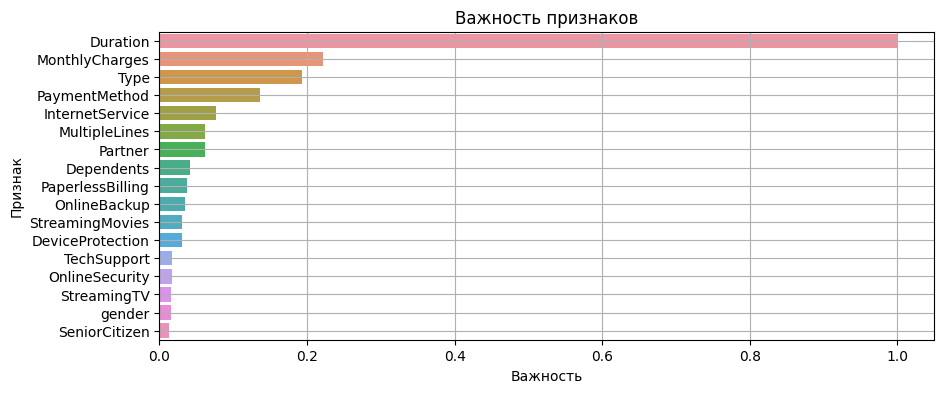

In [64]:
feature_importance = pd.Series(CBC.feature_importances_,
                               index=X_train.columns)
feature_importance = (feature_importance/feature_importance.max()).sort_values(ascending=False)
plt.figure(figsize=(10,4))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Важность признаков')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.grid()
plt.show()

In [65]:
print(confusion_matrix(y_test,CBC.predict(X_test)))

[[1486   20]
 [ 108  147]]


По матрице ошибок можно сказать, что в предсказаниях модели есть ошибок, но их значение не значительное. 

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;background:rgb(185, 176, 207)">
<b>Итоговый комментарий ревьюера V2.1:
</b> Молодец! Хорошая работа! Давай исправим следующие моменты:<br>
    1. Верни, пожалуйста, мои комментарии из первой части проекта и не удаляй их до окончательной сдачи проекта!<br>
    2. Анализ выборки на дисбаланс<br>
    3. Визуализация признаков после объединения выборок и заполнения пропусков<br>
    4. Анализ на мультиколлинеарность<br>
    5. Список категориальных признаков<br>
    6. test_size<br>
    7. Апсемпл<br>
    8. Масштабирование для логистической регрессии<br>
    9. Анализ важности признаков и матрица ошибок
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b>  
<Br>1. Коментарии вернул. 
<Br>2. Добавил
<Br>3. Добавил
<Br>4. Скорректировал
<Br>5. Скорректировал
<Br>6. Поставил 0.25
<Br>7. Убрал
<Br>8. Добавил
<Br>9. Добавил
    
 </div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;background:rgb(185, 176, 207)">
<b>Итоговый комментарий ревьюера V2.2:
</b>  Отлично, осталось исправить самую малость:<br>
    1. OHE<br>
    2. Стоит также провести анализ категориальных признаков на мультиколлинеарность(можно использовать phik для смешанных типов данных)<br>
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b>  
Корректировки внес, drop='first' добавил и построил хитмак для всех признаков с помощью phik
    
 </div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;background:rgb(185, 176, 207)">
<b>Итоговый комментарий ревьюера V2.3:
</b>  Отлично, можешь приступать к отчетной части проекта!
</div>

# Отчет по решению

## Какие пункты плана были выполнены, а какие — нет. Почему?

В рамках проекта были запланировано 4 основных пункта:
1.   Произвести предварительные анализ и проверку предоставленных данных, которые были получены из 4 разных источников
2.   Осуществить обработку данных
3. Подготовить данные к обучению
4. Обучить модели и произвести тестирование метрикой AUC-ROC

Все пункты плана были выполнены, но в ходе выполнения проекта потребовалось дополнительно: создать новый признак "жизни клиента", проверить мультиколлинеарность , провести кодирование данных методом ohe и масштабирование. 


## Какие трудности возникли и как вы их преодолели?

В ходе проекта столкнулся со следующими наиболее значимыми трудностями:


1.   Создание целевого признака "жизни клиента". Исходный столбец "End date" таблицы "Contarct" имел тип object и содержал смешанные числовые, и нечисловые значения, что потребовало несколько дополнительных шагов. Сначала для перевода в тип datetime, а затем в формирование целевого признака.
2.   Обучение моделей с учетом необходимости кодирования данных, подбора параметров, кросс-валидации и обязательного масштабирования числовых признаков для логистической регрессии. В данном случае для решения был выбран путь использования Pipeline для объединения операций предварительной обработки. 



## Какие ключевые шаги в решении задачи вы выделили?

Ключевые шаги:
1.   формирование плана работ
2.   анализ данных
3.  обработка данных
4. визуализация данны
5. подготовка данных к обучению
6. обучение моделей
7. оптимизация моделей
8. тестирование наилучшей модели
9. формирование отчета по решению


## Какие признаки использовали для обучения модели и какая предобработка этих признаков была выполнена?

Для обучения модели использовали как числовые, так и категориальные признаки, которые были получены из 4 источников данных. 
Наиболее значимым и важным признаком стала длительность "жизни" клиента в днях, который был получен путем вычислния разнцы между последним и первым днем пользования услугами связи.
После формирования дополнительного признака из датасета были удалены ненужные данные типа datetime и признак TotalCharges по итогу анализа на мультиколлинеарность.


## Какая ваша итоговая модель, какие у неё гиперпараметы и какое качество?

По итогам проведенной работы наибольшую эффективность продемонстрировала модель CatBoostClassifier со следующими гиперпарамтреами:

*   n_estimators (чсило деревьев) = 300
* max_depth (максимальная глубина дерева) = 4
*   learning_rate (скорость обучения) = 0.2

на тестовой выборке модель показала слеюущий результат:
* roc_auc_score 0.93
* accuracy_score 0.92